# Máquinas de vetores de suporte (SVM)

# Hiperplano ótimo: classes linearmente separáveis

- num problema de classes linearmente separáveis temos em geral uma infinidade de soluções ótimas

- para lidar com esta questão, nas SVM define-se a <span style="color:blue">margem de separação</span>: separação entre o hiperplano de decisão e a observação mais próxima

<img src="./figs/SVM1.png" style="width: 450px;"><figcaption> <font size="3"> Figura retirada de Pattern Recognition and Machine Learning, C. Bishop </figcaption>


# Hiperplano ótimo: classes linearmente separáveis

- o <span style="color:blue">hiperplano ótimo</span> é aquele que separa as classes e maximiza a margem de separação

<img src="./figs/SVM2.png" style="width: 450px;"><figcaption> <font size="3"> Figura retirada de Pattern Recognition and Machine Learning, C. Bishop </figcaption>

- as observações sobre os “hiperplanos margem” são designadas de vetores de suporte

# Hiperplano ótimo: classes linearmente separáveis

- consideremos um problema de duas classes com $t = 1$ para $C_1$ e $t = -1$ para $C_2$ e um conjunto de treino $\{{\bf x}_n , t_n \}_{n=1,\cdots,N}$

- o modelo considerado é linear
$$y(x) = {\bf w}^T {\bf x} + w_0$$

e o classificador retorna +1 sempre que $y(x) > 0$ e -1 sempre que $y(x) < 0$, sendo a fronteira de decisão definida por $y(x) = 0$

- os hiperplanos margem podem ser definidos pelas equações (<span style="color:blue">Porquê?</span> )
$${\bf w}^T {\bf x} + w_0 = 1 \text{  e  } {\bf w}^T {\bf x} + w_0 = -1$$ 
para os respetivos vetores de suporte

# Hiperplano ótimo: classes linearmente separáveis

- a distância entre estes hiperplanos é dada por $\frac{2}{||{\bf w}||}$

- logo, para maximizar a margem temos de minimizar $||w||$ sujeito às condições
\begin{equation*}
\left\{
\begin{matrix} {\bf w}^T {\bf x} + w_0 \geq 1 & x \in C_1\\ 
{\bf w}^T {\bf x} + w_0 \leq -1 & x \in C_2
\end{matrix}
\right.
\end{equation*}

- as condições anteriores obrigam que não existam x ′ n s dentro da margem e podem ser reescritas na forma
$$ t_n ({\bf w}^T {\bf x}_n + w_0 ) \geq 1 \ \ \ n = 1,\cdots, N$$

# Hiperplano ótimo: classes linearmente separáveis

- obtemos assim um problema de otimização cuja formulação primal é
$$ \min \frac{1}{2}||{\bf w}||^2$$
sujeito a 
$$ t_n ({\bf w}^T {\bf x}_n + w_0 ) \geq 1 \ \ \ n = 1,\cdots, N$$

- este é um problema de otimização convexo, pelo que qualquer solução local é na verdade um ótimo global

# Hiperplano ótimo: classes linearmente separáveis

- pode ser resolvido por programação quadrática, com Lagrangeano
$$ \mathcal{L}(w, w_0 , \alpha) = ||{\bf w}||^2 - \sum_{n=1}^{N} \alpha_n (t_n ({\bf w}^T {\bf x}_n + w_0 ) - 1)$$
onde $\alpha = (\alpha_1 ,\cdots, \alpha_N )$ é o vetor de multiplicadores de Lagrange

- derivando em ordem a ${\bf w}$ e $w_0$ obtemos

$${\bf w} = \sum_{n=1}^{N} \alpha_n t_n {\bf x}_n$$
e
$${\bf w} = \sum_{n=1}^{N} \alpha_n t_n $$
onde apenas alguns dos $\alpha_n$ são positivos (os restantes são nulos), correspondendo aos ${\bf x}_n$ que são vetores de suporte

# Hiperplano ótimo: classes linearmente separáveis

- substituindo as expressões anteriores na função Lagrangeana (e com alguma perícia matemática) obtemos a formulação dual do problema

$$ \max \sum_{n=1}^{N}\alpha_n - \frac{1}{2} \sum_{n=1}^{N}\sum_{m=1}^{N} \alpha_n \alpha_m t_n t_m {\bf x}^{T}_{n} {\bf x}_m$$

sujeito a 
$$ \sum_{n=1}^{N}\alpha_n = 0$$
$$\alpha_n \geq 0 \ \ \ \ n=1,\cdots, N$$

- esta formulação é mais fácil de resolver e utiliza apenas os dados de treino!

# Hiperplano ótimo: classes linearmente separáveis

- depois de obter os $\alpha_n$’s ótimos, digamos $\alpha^{*}_n$ , podemos determinar
$${\bf W}^{*} = \sum_{n=1}^{N} \alpha^{*}_n t_n {\bf x}_n = \sum_{i \in \mathcal{M}} \alpha^{*}_i t_i {\bf x}_i$$
onde $\mathcal{M}$ é o conjunto de índices para os quais $\alpha_n \neq 0$

- se ${\bf x}_m$ é um vetor de suporte com (por exemplo) $t_m = 1$, então
$$ w^{*}_0 = 1 - ({\bf w}^{*})^{T} {\bf x}_m = 1 -\sum_{i\in \mathcal{M}} \alpha^{*}_i t_i {\bf x}^{T}_{i} {\bf x}_m$$
ou, numa forma numericamente mais estável
$$ w^{*}_0 = \frac{1}{N_{\mathcal{M}}} \sum_{m\in \mathcal{M}} (t_m - \sum_{i\in \mathcal{M}}\alpha^{*}_i t_i {\bf x}^{T}_{i} {\bf x}_m)$$

# Exemplo

- 2 classes Normais com $\mu_1 = (3, 0)$ e $\mu_2 = (-3, 0)$ e $\Sigma = \left[\begin{matrix} 1 & 0.5 \\  0.5 & 1 \end{matrix}\right]$
<img src="./figs/SVM4.png" style="width: 450px;"><figcaption> <font size="3"> os vetores de suporte estão indicados com cruzes </figcaption>

# Hiperplano ótimo: classes não linearmente separáveis

- neste caso a formulação tem de admitir a existência de observações mal classificadas, isto é, para além das respetivas margens de separação

- é necessário relaxar as condições
$$t_n ({\bf w}^T {\bf x}_n + w_0 )\geq 1 - \xi_n \ \ \ \ n = 1,\cdots,N$$
onde $\xi_n \geq 0$ se designam de slack variables

# Hiperplano ótimo: classes não linearmente separáveis
- é fácil ver que
    - $\xi_n = 0 \rightarrow {\bf x}_n$ está bem classificado e sem violar a respetiva margem
    - $0 < \xi_n \leq 1 \rightarrow {\bf x}_n$ continua bem classificado mas agora violando a respetiva margem
    - $\xi_n > 1 \rightarrow {\bf x}_n$ está do lado errado da fronteira de decisão e portanto mal classificado
    
<img src="./figs/SVM5.png" style="width: 450px;"><figcaption> <font size="3"> os vetores de suporte estão indicados com cruzes </figcaption>
    

# Hiperplano ótimo: classes não linearmente separáveis

- a formulação primal do problema fica agora na forma

$$\min\left[ \frac{1}{2}||{\bf w}||^2 + C\sum_{n=1}^{N}\xi_n\right]$$

sujeito a
$$t_n ({\bf w}^T {\bf x}_n + w_0 )\geq 1 - \xi_n \ \ \ \ n = 1,\cdots,N$$
$$\xi_n \geq 0 \ \ \ n=1,\cdots,N$$
- C é um parâmetro que controla o grau de relaxamento em relação às observações mal classificadas

# Hiperplano ótimo: classes não linearmente separáveis

- a formulação dual é muito semelhante

$$\max\sum_{n=1}^{N}\alpha_n - \frac{1}{2}\sum_{n=1}^{N}\sum_{m=1}^{N}\alpha_n\alpha_m t_n t_m {\bf x}^{T}_{n}{\bf x}_m$$
sujeito a
$$\sum_{n=1}^{N}\alpha_n t_n = 0$$
$$0\leq \alpha_n \leq C \ \ \ \ n = 1,\cdots,N$$

# Hiperplano ótimo: classes não linearmente separáveis

- a solução do problema anterior é igual (expressão) à obtida para classes separáveis (note-se que a única modificação foi a mudança da restrição $\alpha_n \geq 0$ para $0 \leq \alpha_n \leq C$)

- C controla o peso que os erros no conjunto de treino têm no processo de optimização:
    - valores elevados de $C$ implicam uma maior influência das observações mal classificadas levando o método a sobreajustar-se aos dados de treino $\rightarrow$ *overfit*
    - valores pequenos de $C$ implicam uma menor influência das observações mal classificadas e um eventual sub ajuste aos dados

# Exemplo

- 2 classes Normais com $\mu_1 = (1, 0)$ e $\mu_2 = (-1, 0)$ e $\Sigma = \left[\begin{matrix} 1 & 0.5 \\  0.5 & 1 \end{matrix}\right]$

<table><tr>
    <td><img src="./figs/SVM6.png" style="width: 850px;"><figcaption><font size="3"> <span style="color:blue">C=0.1</span></figcaption></td> 
    <td><img src="./figs/SVM7.png" style="width: 850px;"><figcaption> <font size="3"><span style="color:blue">C=100</span> </figcaption></td>
    </tr></table>
    
- consegue encontrar as diferenças?    

# Fronteiras de decisão não lineares

- segundo o Teorema de Cover, dado um espaço de entrada ${\bf x}$ onde as classes são não (linearmente) separáveis, é possível transformá-lo num novo espaço $\phi({\bf x})$ onde as classes são, com elevada probabilidade, separáveis

- $\phi$ tem de ser não linear
- $\phi({\bf x})$ tem de ter dimensionalidade suficiente (superior ao espaço original)
- obtém-se o hiperplano ótimo (SVM linear) no espaço $\phi({\bf x})$ que é posteriormente convertida numa fronteira não linear no espaço original

# Fronteiras de decisão não lineares

- a formulação dual fica

$$\max\sum_{n=1}^{N}\alpha_n - \frac{1}{2}\sum_{n=1}^{N}\sum_{m=1}^{N}\alpha_n\alpha_m t_n t_m \phi({\bf x}_{n})^{T}\phi({\bf x}_m)$$
sujeito a
$$\sum_{n=1}^{N}\alpha_n t_n = 0$$
$$0\leq \alpha_n \leq C \ \ \ \ n = 1,\cdots,N$$

- ou seja, tudo se resume a saber calcular um produto interno no espaço $\phi({\bf x})$

# Fronteiras de decisão não lineares: kernel trick

- determinar $\phi$ é extremamente complicado
- o problema é contornado com uma função kernel
$$K({\bf x}_n,{\bf x}_m) = \phi({\bf x}_n)^T \phi({\bf x}_m)$$

que nos dá o valor do produto interno sem necessidade de construir $\phi$ (*kernel trick*)

- a função kernel tem de estar definida de acordo com o teorema de Mercer

# Fronteiras de decisão não lineares

- a formulação dual fica

$$\max\sum_{n=1}^{N}\alpha_n - \frac{1}{2}\sum_{n=1}^{N}\sum_{m=1}^{N}\alpha_n\alpha_m t_n t_m K({\bf x}_n,{\bf x}_m)$$
sujeito a
$$\sum_{n=1}^{N}\alpha_n t_n = 0$$
$$0\leq \alpha_n \leq C \ \ \ \ n = 1,\cdots,N$$

# Fronteiras de decisão não lineares

- recorde-se que a solução deste problema é da forma
$${\bf w} = \sum_{i\in \mathcal{M}}\alpha_i t_i \phi({\bf x}_i)$$

onde $\mathcal{M}$ é o conjunto de índices para os quais $0 < \alpha_i < C$

- no entanto não precisamos explicitamente de ${\bf w}$ nem de $\phi$ pois para classificar uma observação ${\bf x}$ tem-se

$${\bf w}^T \phi({\bf x}) + w_0 = \sum_{i\in\mathcal{M}} \alpha_i t_i \phi({\bf x}_i)^T \phi({\bf x}) + w_0 = \sum_{i\in\mathcal{M}} \alpha_i t_i K({\bf x}_i, {\bf x}) + w_0$$
$$w_0 = \frac{1}{N_{\mathcal{M}}} \sum_{j\in\mathcal{M}} (t_j - \sum_{i\in\mathcal{M}}\alpha_i t_i K({\bf x}_i, {\bf x}))$$

# Fronteiras de decisão não lineares: funções kernel

- a tabela seguinte mostra algumas das funções kernel mais utilizadas

| Modelo | $$K(x,y)$$ | Observações |
| --- | --- | --- |
| SVM polinomial | $$({\bf x}^T {\bf y} + 1)^P$$ | p é estabelecido pelo utilizador |
| SVM-RBF | $$\exp(-\frac{1}{2\sigma^2}||{\bf x} - {\bf y}||^2)$$ | $\sigma$ é estabelecido pelo utilizador |
| MLP | $$\tanh(\beta_{0}{\bf x}^T {\bf y} + \beta_1)$$ | apenas satisfaz o teorema de Mercer para alguns valores de $\beta_0$ e $\beta_1$ |

# Exemplo

- 2 classes Normais com $\mu_1 = (1, 0)$ e $\mu_2 = (-1, 0)$ e $\Sigma = \left[\begin{matrix} 1 & 0.5 \\  0.5 & 1 \end{matrix}\right]$ com SVM-RBF $(\sigma = \sqrt{1/2})$

<table><tr>
    <td><img src="./figs/SVM8.png" style="width: 850px;"><figcaption><font size="3"> <span style="color:blue">C=0.1</span></figcaption></td> 
    <td><img src="./figs/SVM9.png" style="width: 850px;"><figcaption> <font size="3"><span style="color:blue">C=1000</span> </figcaption></td>
    </tr></table>


# SVMs para problemas multi‐classe

- não existe uma formulação de raiz para o problema de múltiplas classes

- a solução passa por realizar estratégias tipo *one-against-all* ou *one-against-one* e combinar os resultados de alguma forma inteligente

- sugere-se a leitura da secção 7.1.3 de PRLM

# Exemplo

- Dados: Iris

<table><tr>
    <td><img src="./figs/SVM10.png" style="width: 850px;"><figcaption><font size="3"> <span style="color:blue">C=0.1</span></figcaption></td> 
    <td><img src="./figs/SVM11.png" style="width: 850px;"><figcaption> <font size="3"><span style="color:blue">C=100</span> </figcaption></td>
    </tr></table>

- o algoritmo default utiliza a estratégia one-vs-one

# Exemplo

In [11]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [12]:
data_x, data_y = load_iris(return_X_y=True)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(data_x, 
                                                    data_y, 
                                                    test_size=0.3, 
                                                    random_state=42)

In [14]:
svm_iris = SVC(C=0.1, kernel='rbf')

In [15]:
svm_iris.fit(X_train,y_train)

SVC(C=0.1)

In [16]:
h = .02
x_min, x_max = X_test[:, 2].min() - 1, X_test[:, 2].max() + 1
y_min, y_max = X_test[:, 3].min() - 1, X_test[:, 3].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [17]:
Z = svm_iris.predict(np.c_[xx.ravel(), yy.ravel(), xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

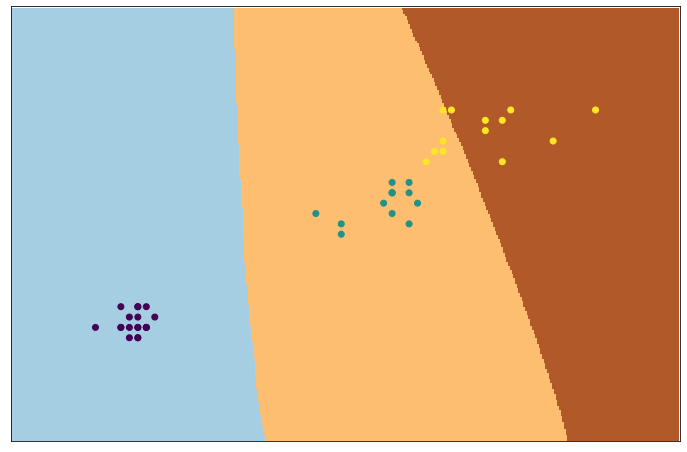

In [18]:
plt.figure(1, figsize=(12,8))
plt.clf()
plt.imshow(Z, interpolation="nearest",
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired, aspect="auto", origin="lower")

plt.scatter(X_test[:, 2], X_test[:, 3], c=y_test)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [19]:
pred = svm_iris.predict(X_test)

In [20]:
confusion_matrix(y_test,pred)

array([[19,  0,  0],
       [ 0, 12,  1],
       [ 0,  0, 13]], dtype=int64)

# SVMs para regressão

- o conceito de SVM pode também ser estendido para problemas de regressão

- neste caso, a função objetivo terá a forma
$$\frac{1}{2}||{\bf w}||^2 + C \sum_{n=1}^{N}E_{\epsilon}(y({\bf x}_n) - t_n)$$
com
$$E_{\epsilon}(y({\bf x}_n) - t_n) = \left\{\begin{matrix} 0, & \text{se } |y({\bf x}) - t| < \epsilon\\  |y({\bf x}) - t| - \epsilon & \text{caso contrário} \end{matrix}\right.$$

# SVMs para regressão

- a função $E_{\epsilon}$ penaliza apenas as observações exteriores a um $\epsilon$-tubo

<img src="./figs/SVR1.png" style="width: 450px;">

- introduzindo 2 slack variables não-negativas para cada observação poderemos escrever
$$t_n \leq y({\bf x}_n) + \epsilon + \xi_n$$
$$t_n \geq y({\bf x}_n) - \epsilon - \hat{\xi}_n$$

# SVMs para regressão

- a formulação primal do problema fica

$$\min \left[\frac{1}{2}||{\bf w}||^2 + C\sum_{n=1}^{N}(\xi_n + \hat{\xi}_n)\right]$$
sujeito a
$$t_n \leq y({\bf x}_n) + \epsilon + \xi_n, \ \ \ n=1,\cdots,N$$
$$t_n \geq y({\bf x}_n) - \epsilon - \hat{\xi}_n, \ \ \ n=1,\cdots,N$$
$$\xi_n \geq 0, \ \ \ n=1,\cdots,N$$
$$\hat{\xi}_n \geq 0, \ \ \ n=1,\cdots,N$$

# SVMs para regressão

- mostra-se que
$$y({\bf x}) = \sum_{n=1}^{N}(\alpha_n - \hat{\alpha}_n)K({\bf x},{\bf x}_n) + w_0$$

- $\alpha_n$ e $\hat{\alpha}_n$ são multiplicadores de Lagrange associados a cada x n tais que pelo menos um deles é nulo

- os vetores de suporte são aqueles ${\bf x}_i$ para os quais $\alpha_i \neq 0$ ou $\hat{\alpha}_i \neq 0$, pelo que

$$y({\bf x}) = \sum_{i\in \mathcal{M}}(\alpha_i - \hat{\alpha}_i)K({\bf x},{\bf x}_i) + w_0$$

# Exemplo

- Problema (ver regressão linear): prever as vendas de determinado produto como função do valor gasto em publicidade na TV

In [21]:
import pandas as pd
from sklearn.svm import SVR

In [22]:
data_advertising = pd.read_csv('../data/Advertising.csv')

FileNotFoundError: [Errno 2] File ../data/Advertising.csv does not exist: '../data/Advertising.csv'

In [4]:
data_advertising.drop(columns='Unnamed: 0',inplace=True)

In [6]:
data_advertising.keys()

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [7]:
X_train, X_test, y_train, y_test = train_test_split(data_advertising.drop(columns='sales'), 
                                                    data_advertising['sales'].values, 
                                                    test_size=0.3, 
                                                    random_state=42)

In [45]:
adv_svr = SVR(C=0.1,kernel='rbf')
adv_svr2 = SVR(C=100,kernel='rbf')

In [46]:
adv_svr.fit(X_train, y_train)
adv_svr2.fit(X_train, y_train)

SVR(C=100)

In [47]:
sv_ind = adv_svr.support_
sv_ind2 = adv_svr2.support_

In [48]:
X_plot = np.c_[np.linspace(X_train['TV'].min(), X_train['TV'].max(), 1000),
               np.linspace(X_train['radio'].min(), X_train['radio'].max(), 1000),
               np.linspace(X_train['newspaper'].min(), X_train['newspaper'].max(), 1000)
              ]

In [49]:
y1_plot = adv_svr.predict(X_plot)
y2_plot = adv_svr2.predict(X_plot)

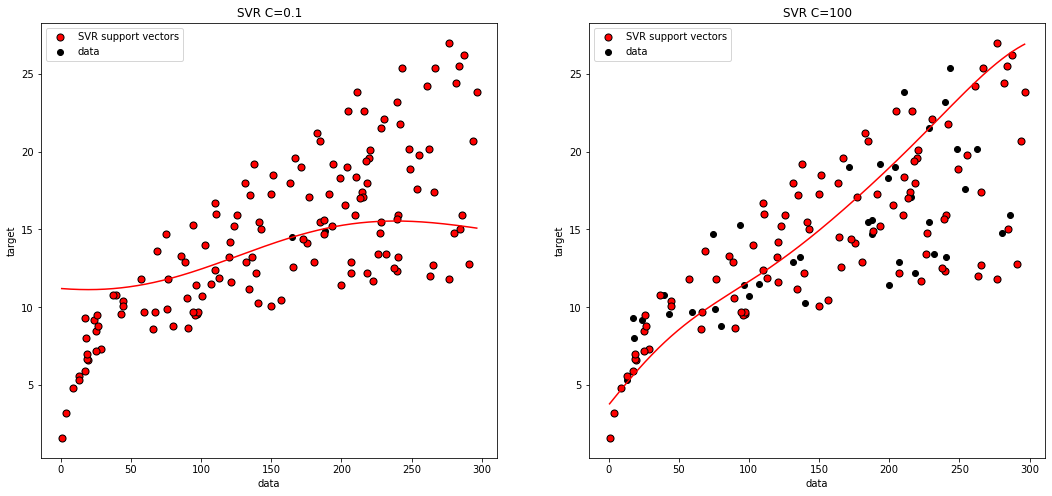

In [56]:
fig, ax = plt.subplots(1,2,figsize=(18,8))
ax[0].scatter(X_train['TV'].values[sv_ind], y_train[sv_ind], c='r', s=50, label='SVR support vectors',
            zorder=2, edgecolors=(0, 0, 0))
ax[0].scatter(X_train['TV'], y_train, c='k', label='data', zorder=1)
ax[0].plot(X_plot[:,0], y1_plot, c='r')
ax[0].set_xlabel('data')
ax[0].set_ylabel('target')
ax[0].set_title('SVR C=0.1')
ax[0].legend()

ax[1].scatter(X_train['TV'].values[sv_ind2], y_train[sv_ind2], 
              c='r', s=50, label='SVR support vectors',
            zorder=2, edgecolors=(0, 0, 0))
ax[1].scatter(X_train['TV'], y_train, c='k', label='data', zorder=1)
ax[1].plot(X_plot[:,0], y2_plot, c='r')
ax[1].set_xlabel('data')
ax[1].set_ylabel('target')
ax[1].set_title('SVR C=100')
ax[1].legend()

## Afinando os modelos

In [8]:
from sklearn.model_selection import GridSearchCV

In [7]:
np.range?

Object `np.range` not found.


In [9]:
adv_svr_fine = GridSearchCV(SVR(kernel='rbf', gamma=0.1),
                   param_grid={'C': np.arange(1.5,2.5,0.1),
                               'gamma': np.arange(0.05,0.15,0.01),
                               'epsilon':np.arange(0.05,0.15,0.01)})

#numpy.arange([start, ]stop, [step, ], dtype=None) 

In [10]:
adv_svr_fine.fit(X_train,y_train)

NameError: name 'X_train' is not defined

In [62]:
pd.DataFrame(adv_svr_fine.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_epsilon,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003601,0.001356,0.002225,0.000826,1.5,0.05,0.05,"{'C': 1.5, 'epsilon': 0.05, 'gamma': 0.05}",0.012200,-0.121154,-0.067111,0.019230,-0.008616,-0.033090,0.053480,140
1,0.002080,0.000123,0.001315,0.000029,1.5,0.05,0.06,"{'C': 1.5, 'epsilon': 0.05, 'gamma': 0.0600000...",0.006313,-0.125509,-0.071472,0.014114,-0.015907,-0.038492,0.052810,275
2,0.002057,0.000089,0.001362,0.000109,1.5,0.05,0.07,"{'C': 1.5, 'epsilon': 0.05, 'gamma': 0.07}",0.002492,-0.127672,-0.074546,0.010735,-0.020256,-0.041849,0.052215,420
3,0.002026,0.000065,0.001311,0.000036,1.5,0.05,0.08,"{'C': 1.5, 'epsilon': 0.05, 'gamma': 0.0800000...",-0.000099,-0.128713,-0.076684,0.008365,-0.023057,-0.044038,0.051677,594
4,0.002140,0.000185,0.001348,0.000036,1.5,0.05,0.09,"{'C': 1.5, 'epsilon': 0.05, 'gamma': 0.0900000...",-0.001911,-0.129187,-0.078253,0.006629,-0.024974,-0.045539,0.051215,783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.002026,0.000119,0.001254,0.000011,2.4,0.14,0.1,"{'C': 2.400000000000001, 'epsilon': 0.14, 'gam...",-0.005899,-0.119623,-0.070671,0.008440,-0.019925,-0.041536,0.047289,399
996,0.002036,0.000164,0.001252,0.000004,2.4,0.14,0.11,"{'C': 2.400000000000001, 'epsilon': 0.14, 'gam...",-0.007187,-0.119957,-0.071999,0.006868,-0.021120,-0.042679,0.046928,470
997,0.002001,0.000149,0.001251,0.000005,2.4,0.14,0.12,"{'C': 2.400000000000001, 'epsilon': 0.14, 'gam...",-0.008112,-0.120155,-0.073069,0.005628,-0.022057,-0.043553,0.046639,539
998,0.002025,0.000189,0.001258,0.000034,2.4,0.14,0.13,"{'C': 2.400000000000001, 'epsilon': 0.14, 'gam...",-0.008779,-0.120283,-0.073964,0.004636,-0.022828,-0.044244,0.046413,611


In [1]:
best_par = adv_svr_fine.best_estimator_.get_params()

NameError: name 'adv_svr_fine' is not defined

In [66]:
y_plot = adv_svr_fine.best_estimator_.predict(X_plot)

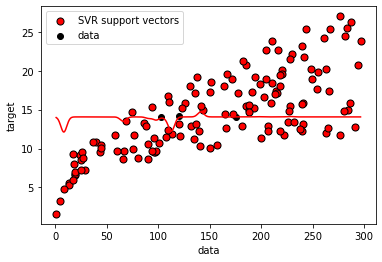

In [70]:
# Look at the results
sv_ind = adv_svr_fine.best_estimator_.support_
plt.scatter(X_train['TV'].values[sv_ind], y_train[sv_ind], c='r', s=50, label='SVR support vectors',
            zorder=2, edgecolors=(0, 0, 0))
plt.scatter(X_train['TV'], y_train, c='k', label='data', zorder=1)
plt.plot(X_plot[:,0], y_plot, c='r')
plt.xlabel('data')
plt.ylabel('target')
#plt.set_title(f'SVR C = {best_par['C']:.2f}, $\epsilon =$ {best_par['epsilon']}, gamma = {best_par['gamma']}')
plt.legend()

In [68]:
best_par['C']

2.400000000000001